In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# load the data

In [2]:
# load the dataset
# keep data.csv and this notebook in the same location or change the dataset path.
df = pd.read_csv('data.csv')

# load the gene data
gene = pd.read_csv('genes.csv')

# get unique gene
genes = set(gene['Gene Symbol'])

# filter the df for the given genes
df = df[df['Gene Symbol'].isin(genes)]

In [3]:
df.to_csv('GENE_DATA.csv')

# drop NaN rows

In [4]:
# drop missing rows
df.dropna(inplace=True)

# Convert categorical data to numeric one

In [5]:
df['Strand'] = df['Strand'].replace(['+','-'],[1,0])
df['tag'] = df['tag'].replace(['---','seleno'],[1,0])
df['gene_source'] = df['gene_source'].replace(['ensembl','RefSeq'],[1,0])
df['transcript_source'] = df['transcript_source'].replace(['ensembl','RefSeq'],[1,0])
df['transcript_biotype'] = df['transcript_biotype'].replace(df['transcript_biotype'].unique(),range(len(df['transcript_biotype'].unique())))
df['gene_biotype'] = df['gene_biotype'].replace(df['gene_biotype'].unique(),range(len(df['gene_biotype'].unique())))
df['Chromosome'] = df['Chromosome'].replace(df['Chromosome'].unique(),range(len(df['Chromosome'].unique())))

# Delete unwanted columns
df.drop('Gene Symbol',axis=1,inplace=True)
df.drop('gene_name',axis=1,inplace=True)
df.drop('Start',axis=1,inplace=True)
df.drop('Stop',axis=1,inplace=True)

# get dataframe as nd-array
X = df.values

# Scaling

In [6]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

hiererchial clustering....


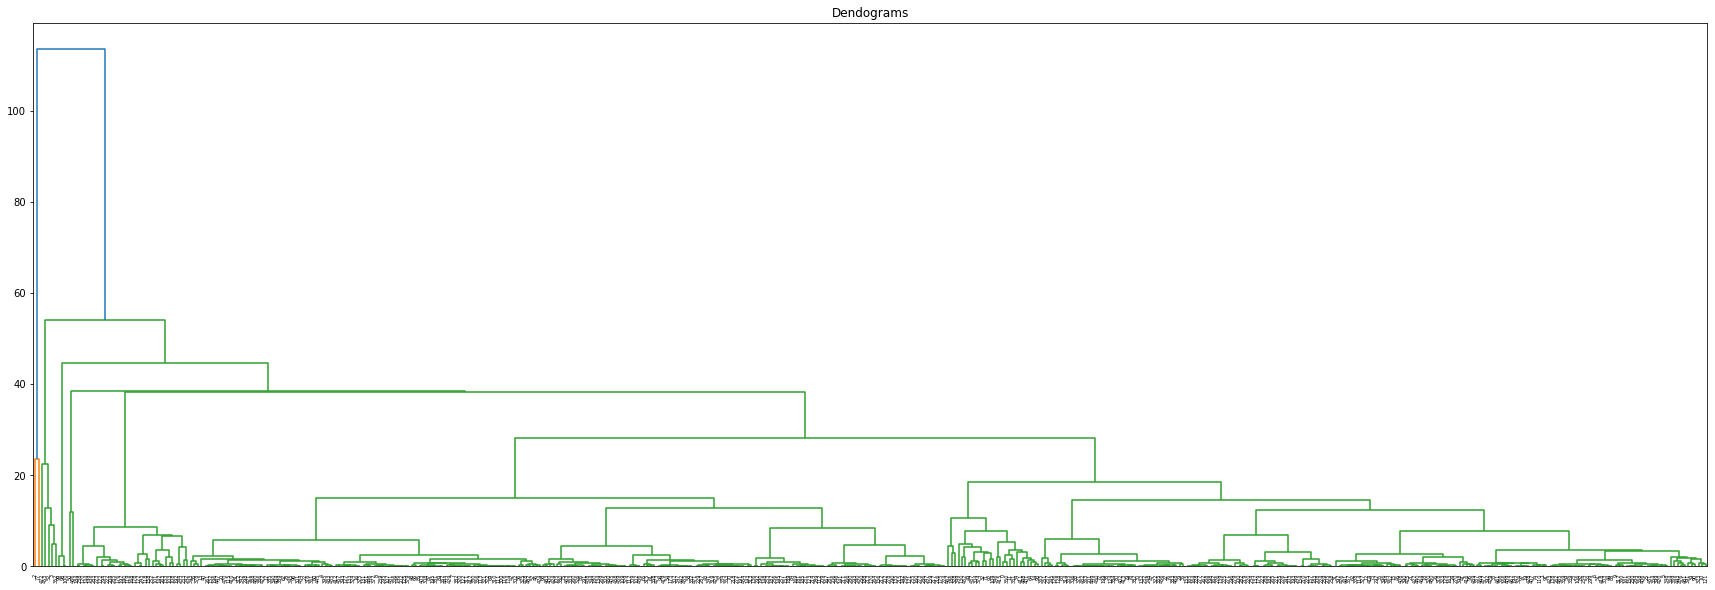

Number of clusters = 1


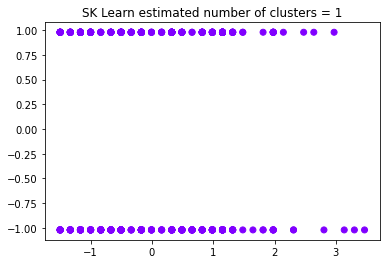

In [7]:
print('hiererchial clustering....')
# dendrogram
plt.figure(figsize=(30, 10))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
# plt.xticks(rotation=90)
# plt.savefig('dendo.png')
plt.show()


# Initialize hiererchial clustering method, in order for the algorithm to determine the number of clusters
# put n_clusters=None, compute_full_tree = True,
# best distance threshold value for this dataset is distance_threshold = 200
cluster = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', compute_full_tree=True, distance_threshold=200)

# Cluster the data
cluster.fit_predict(X)

print(f"Number of clusters = {1+np.amax(cluster.labels_)}")

# Display the clustering graphically in a plot
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')
plt.title(f"SK Learn estimated number of clusters = {1+np.amax(cluster.labels_)}")
plt.show()

In [8]:
# Create a new column called 'Cluster' containing Cluster number
df['Cluster'] = cluster.labels_

In [9]:
# check the last column Cluster number is assigned against each row
df.head(10)

,Chromosome,Strand,gene_biotype,gene_source,tag,transcript_biotype,transcript_source,GC-JN-9178-12-IC_S13,GC-JN-9178-9-OC_S10,GC-JN-9178-9-R_S6,...,GC-JN-9178-11-OC_S17,GC-JN-9178-10-OC_S2,GC-JN-9178-9-IC_S12,GC-JN-9178-11-IC_S16,GC-JN-9178-12-OC_S14,GC-JN-9178-10-IC_S1,BLGCSEQ0192-RNAControl1_S18,BLGCSEQ0192-RNAControl3_S20,BLGCSEQ0192-RNAControl2_S19,Cluster
79,0,1,0,1,1,0,1,633.00,287.00,607.00,...,357.00,792.0030,1006.0000,448.00,844.002,771.998,7.00,8.00,11.00,0
122,1,0,0,1,1,0,1,68.00,15.00,72.00,...,61.00,99.0001,90.9999,54.00,113.000,206.000,5.00,6.00,6.00,0
154,2,0,0,1,1,0,1,16531.30,5638.91,19539.90,...,10233.80,23498.2000,25691.5000,13147.50,26387.700,6441.210,1019.99,1166.41,1333.86,0
160,3,0,0,1,1,0,1,5098.78,1280.00,5727.82,...,2993.93,5548.1100,6360.7700,3955.83,7701.620,1641.980,33.00,47.00,44.00,0
238,2,1,0,1,1,0,1,119.00,45.00,159.00,...,173.00,251.0000,225.0000,168.00,296.000,286.000,3.00,4.00,8.00,0
244,4,0,0,1,1,0,1,61.00,28.00,51.00,...,31.00,52.0000,81.0000,47.00,102.000,152.000,0.00,5.00,3.00,0
248,5,0,0,1,1,0,1,57.00,4.00,41.00,...,8.00,52.0000,47.0000,29.00,78.000,240.000,0.00,0.00,0.00,0
281,6,1,0,1,1,0,1,44.00,5.00,23.00,...,27.00,30.0000,45.0000,15.00,39.000,65.000,1.00,4.00,4.00,0
284,7,1,0,1,1,0,1,3.00,0.00,3.00,...,1.00,0.0000,2.0000,5.00,9.000,17.000,0.00,0.00,0.00,0
400,5,0,0,1,1,0,1,62.00,17.00,47.00,...,42.00,92.0000,101.0000,45.00,64.000,45.000,0.00,0.00,1.00,0


# check this

In [10]:
# cluster label assigned
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
# get the max label number
np.amax(cluster.labels_)

0

In [12]:
# add 1 because cluster labelling starts from 0
# get the number of cluster allotted 
1 + np.amax(cluster.labels_)

1